# Australian Weather Forecasting - Imputing Data

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import theano
import theano.tensor as tt
import itertools
import matplotlib.pyplot as plt
import scipy.stats as scistat
import arviz as az
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
aussy_Rain = pd.read_csv('../data/weather_imputed.csv')

### Convert our Date column into datetime object

In [3]:
aussy_Rain['Date']=pd.to_datetime(aussy_Rain['Date'])

### Convert Date into Season 
Thanks to https://stackoverflow.com/questions/44124436/python-datetime-to-season 

In [11]:
[(month%12 + 3)//3 for month in range(1, 13)]

[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]

Where, in Australia: http://www.bom.gov.au/climate/glossary/seasons.shtml  
* Month 1 = Summer
* Month 2 = Autumn
* Month 3 = Winter
* Month 4 = Spring

In [12]:
aussy_Rain['Date'] = (aussy_Rain.Date.dt.month%12 + 3)//3

In [13]:
aussy_Rain['Date']

63194     2
17012     3
30693     3
108452    1
139442    1
         ..
47652     1
106520    3
30710     3
24216     4
129897    1
Name: Date, Length: 3000, dtype: int64

### Dummy encoding for other Categoricals

In [14]:
encoding = dict()
for column in aussy_Rain:
    if aussy_Rain[column].dtype == object:
        unique = aussy_Rain[column].unique()
        encoding[column] = {name: index for index, name in enumerate(unique)}
encoding

{'Location': {'MelbourneAirport': 0,
  'Newcastle': 1,
  'Sydney': 2,
  'Albany': 3,
  'Katherine': 4,
  'Watsonia': 5,
  'NorfolkIsland': 6,
  'Adelaide': 7,
  'MountGinini': 8,
  'Brisbane': 9,
  'WaggaWagga': 10,
  'PearceRAAF': 11,
  'NorahHead': 12,
  'Moree': 13,
  'Nuriootpa': 14,
  'GoldCoast': 15,
  'Launceston': 16,
  'SydneyAirport': 17,
  'Cobar': 18,
  'Albury': 19,
  'MountGambier': 20,
  'AliceSprings': 21,
  'Witchcliffe': 22,
  'Tuggeranong': 23,
  'Cairns': 24,
  'Canberra': 25,
  'Perth': 26,
  'CoffsHarbour': 27,
  'Bendigo': 28,
  'Hobart': 29,
  'PerthAirport': 30,
  'Woomera': 31,
  'Ballarat': 32,
  'Dartmoor': 33,
  'Nhil': 34,
  'Sale': 35,
  'SalmonGums': 36,
  'Townsville': 37,
  'Richmond': 38,
  'Penrith': 39,
  'Mildura': 40,
  'Walpole': 41,
  'Portland': 42,
  'BadgerysCreek': 43,
  'Uluru': 44,
  'Williamtown': 45,
  'Wollongong': 46,
  'Melbourne': 47,
  'Darwin': 48},
 'WindGustDir': {'N': 0,
  'ESE': 1,
  'SSE': 2,
  'E': 3,
  'WSW': 4,
  'NNE': 5,


In [15]:
aussy_Rain = aussy_Rain.replace(encoding)

Remove RISK_MM (kaggle dataset authors say this variable should be removed)

In [16]:
aussy_Rain = aussy_Rain.drop(['RISK_MM'], axis=1)

### Visualize model with priors

logp = -1,437.7, ||grad|| = 3.0458: 100%|███| 228/228 [00:01<00:00, 203.03it/s]


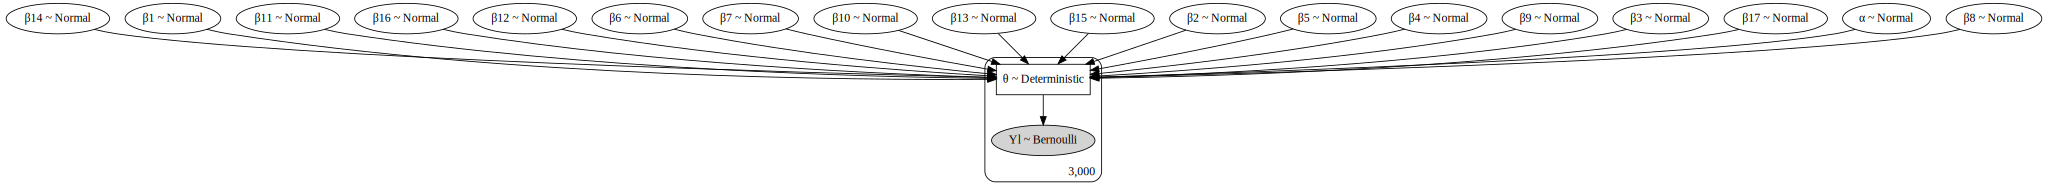

In [17]:
#### Posterior Distribution of parameters# Use pm.find_MAP() to find the maximum a-posteriori (MAP) estimate for the vector of regression coefficients .

with pm.Model() as manual_logistic_model:
    Y = aussy_Rain["RainTomorrow"]
    α = pm.Normal('α', mu=0, sd=100) 
    β1 = pm.Normal('β1', mu=0, sd=100) 
    β2 = pm.Normal('β2', mu=0, sd=100) 
    β3 = pm.Normal('β3', mu=0, sd=100) 
    β4 = pm.Normal('β4', mu=0, sd=100)
    β5 = pm.Normal('β5', mu=0, sd=100) 
    β6 = pm.Normal('β6', mu=0, sd=100)
    β7 = pm.Normal('β7', mu=0, sd=100) 
    β8 = pm.Normal('β8', mu=0, sd=100)
    β9 = pm.Normal('β9', mu=0, sd=100)
    β10 = pm.Normal('β10', mu=0, sd=100)
    β11 = pm.Normal('β11', mu=0, sd=100)
    β12 = pm.Normal('β12', mu=0, sd=100)
    β13 = pm.Normal('β13', mu=0, sd=100)
    β14 = pm.Normal('β14', mu=0, sd=100)
    β15 = pm.Normal('β15', mu=0, sd=100)
    β16 = pm.Normal('β16', mu=0, sd=100)
    β17 = pm.Normal('β17', mu=0, sd=100)


    μ = α + pm.math.dot(aussy_Rain["MinTemp"], β1) + pm.math.dot(aussy_Rain["MaxTemp"],β2) + pm.math.dot(aussy_Rain["Rainfall"], β3) + pm.math.dot(aussy_Rain["WindGustSpeed"],β4) + pm.math.dot(aussy_Rain["WindSpeed9am"], β5) + pm.math.dot(aussy_Rain["WindSpeed3pm"],β6) + pm.math.dot(aussy_Rain["Humidity9am"], β7) + pm.math.dot(aussy_Rain["Humidity3pm"],β8) + pm.math.dot(aussy_Rain["Pressure9am"], β9) + pm.math.dot(aussy_Rain["Pressure3pm"], β10) + pm.math.dot(aussy_Rain["Pressure9am"], β11) + pm.math.dot(aussy_Rain["Location"], β12) + pm.math.dot(aussy_Rain["WindGustDir"],β13) + pm.math.dot(aussy_Rain["WindDir9am"],β14) + pm.math.dot(aussy_Rain["WindDir3pm"],β15) + pm.math.dot(aussy_Rain["RainToday"],β16) + pm.math.dot(aussy_Rain["Date"], β17) 
    θ = pm.Deterministic('θ',  pm.invlogit(μ))
    Yl = pm.Bernoulli('Yl', p=θ, observed=Y) 
    map_estimate = pm.find_MAP()
    #print(map_estimate)
pm.model_to_graphviz(manual_logistic_model)

### MAP ESTIMATE FOR Parameters (Logistic)

In [18]:
map_estimate

{'α': array(-0.10625798),
 'β1': array(-0.09901168),
 'β2': array(0.32663704),
 'β3': array(-0.17891962),
 'β4': array(-0.2125001),
 'β5': array(-0.07907938),
 'β6': array(0.38613716),
 'β7': array(0.11548822),
 'β8': array(-0.76815125),
 'β9': array(-0.05607071),
 'β10': array(0.15362336),
 'β11': array(-0.05607071),
 'β12': array(0.00949619),
 'β13': array(0.01242763),
 'β14': array(-0.00612585),
 'β15': array(-0.01139137),
 'β16': array(1.11207934),
 'β17': array(0.21185692),
 'θ': array([0.36815988, 0.71929262, 0.82449309, ..., 0.62765135, 0.84394882,
        0.84563853])}

In [20]:
with pm.Model() as logistic_model:
        Y = aussy_Rain.RainTomorrow
        pm.glm.GLM.from_formula('Y ~ MinTemp + MaxTemp + Rainfall + WindGustSpeed + WindSpeed9am + WindSpeed3pm + Humidity9am + Humidity3pm + Pressure9am + Pressure3pm + Temp9am + Temp3pm + Location + WindGustDir + WindDir9am + WindDir3pm + RainToday + Date', aussy_Rain, family=pm.glm.families.Binomial())
        trace = pm.sample(1000, tune=1000, cores=4, init='adapt_diag', target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Date, RainToday, WindDir3pm, WindDir9am, WindGustDir, Location, Temp3pm, Temp9am, Pressure3pm, Pressure9am, Humidity3pm, Humidity9am, WindSpeed3pm, WindSpeed9am, WindGustSpeed, Rainfall, MaxTemp, MinTemp, Intercept]
Sampling 4 chains, 0 divergences: 100%|█| 8000/8000 [02:30<00:00, 53.23draws/s]


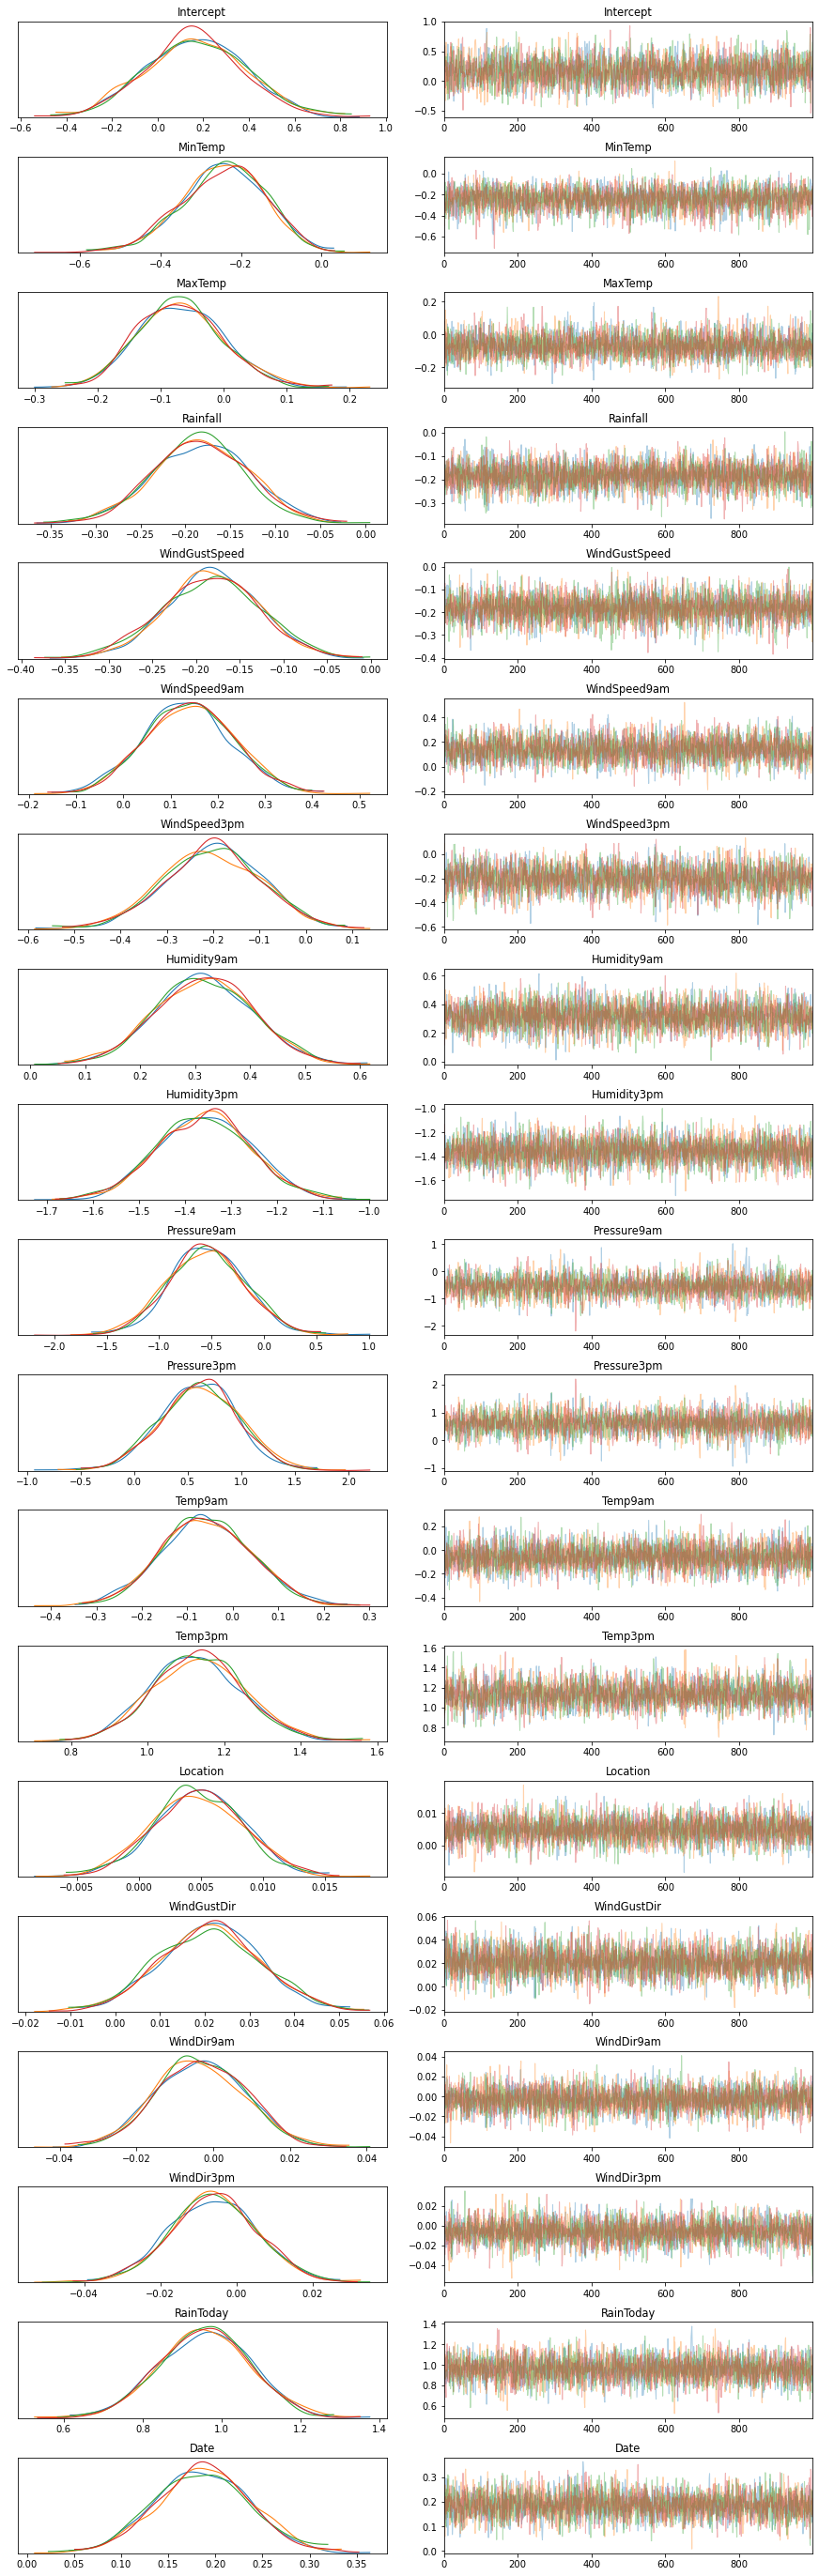

In [21]:
with pm.Model() as logistic_model:
    pm.traceplot(trace)

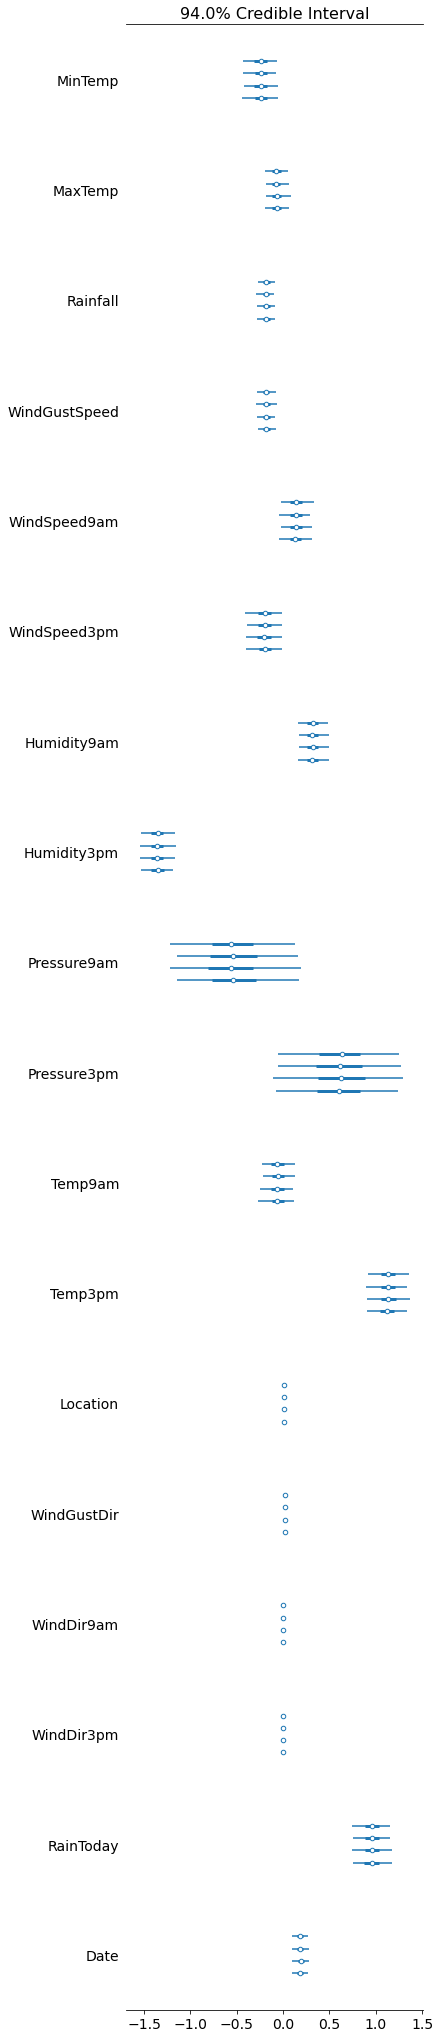

In [22]:
with pm.Model() as logistic_model:
    az.plot_forest(trace, var_names="~Intercept")

### Unpooled Model

In [23]:
Local = aussy_Rain.Location.unique()
locations = len(Local)
Location_lookup = dict(zip(Local, range(len(Local))))
location_Code = aussy_Rain['Location'] = aussy_Rain.Location.replace(Location_lookup).values 
print(aussy_Rain['Location'])

137856     0
44212      1
82393      2
88215      3
31081      4
          ..
140511    47
16150     45
33456     33
86748      9
115741     5
Name: Location, Length: 3000, dtype: int64


In [24]:
Rainfall = aussy_Rain['Rainfall']
RainTomorrow =aussy_Rain['RainTomorrow']

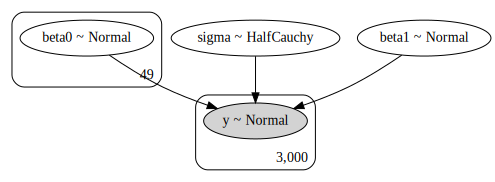

In [25]:
with pm.Model() as unpooled_model:
    beta0 = pm.Normal('beta0', 0, sd=1e5, shape=locations)
    beta1 = pm.Normal('beta1', 0, sd=1e5)
    sigma = pm.HalfCauchy('sigma', 5)
    theta = beta0[location_Code] + beta1*Rainfall
    y = pm.Normal('y', theta, sd=sigma, observed=RainTomorrow)
pm.model_to_graphviz(unpooled_model)

In [26]:
with unpooled_model:
    unpooled_trace = pm.sample(1000, cores = 4, tune=1000)
    unpooled_idata = az.from_pymc3(unpooled_trace)
az.summary(unpooled_idata, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta1, beta0]
Sampling 4 chains, 0 divergences: 100%|█| 8000/8000 [00:08<00:00, 991.16draws/s


mean    sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
beta0[0]   0.78  0.05    0.69     0.88        0.0      0.0  10219.44   
beta0[1]   0.78  0.05    0.68     0.87        0.0      0.0   8014.87   
beta0[2]   0.71  0.06    0.59     0.82        0.0      0.0   9847.42   
beta0[3]   0.77  0.05    0.67     0.87        0.0      0.0   8548.84   
beta0[4]   0.74  0.05    0.65     0.82        0.0      0.0   9223.76   
beta0[5]   0.80  0.05    0.70     0.89        0.0      0.0   8771.63   
beta0[6]   0.89  0.08    0.73     1.05        0.0      0.0   8435.97   
beta0[7]   0.79  0.05    0.69     0.89        0.0      0.0  10583.13   
beta0[8]   0.71  0.05    0.61     0.81        0.0      0.0   7437.59   
beta0[9]   0.68  0.05    0.59     0.78        0.0      0.0  11676.49   
beta0[10]  0.83  0.05    0.73     0.91        0.0      0.0   8848.86   
beta0[11]  0.82  0.05    0.73     0.91        0.0      0.0   8160.20   
beta0[12]  0.71  0.05    0.62     0.80        0.0      0.0  10246.47   
beta0[13]  0.84  0.05    0.74     0.94        0.0      0.0  10066.65   
beta0[14]  0.71  0.05    0.62     0.80        0.0      0.0  10332.26   
beta0[15]  0.91  0.05    0.81     1.01        0.0      0.0   8904.70   
beta0[16]  0.78  0.05    0.69     0.87        0.0      0.0   8215.33   
beta0[17]  0.92  0.05    0.84     1.02        0.0      0.0   9761.34   
beta0[18]  0.74  0.05    0.65     0.84        0.0      0.0   8810.42   
beta0[19]  0.74  0.06    0.64     0.84        0.0      0.0  11492.42   
beta0[20]  0.71  0.06    0.61     0.82        0.0      0.0   8872.22   
beta0[21]  0.76  0.05    0.67     0.85        0.0      0.0   7921.15   
beta0[22]  0.81  0.06    0.70     0.93        0.0      0.0  10495.41   
beta0[23]  0.57  0.05    0.49     0.66        0.0      0.0   8027.00   
beta0[24]  0.78  0.05    0.69     0.87        0.0      0.0   8606.68   
beta0[25]  0.81  0.05    0.72     0.90        0.0      0.0  10687.43   
beta0[26]  0.61  0.05    0.50     0.70        0.0      0.0   8758.26   
beta0[27]  0.87  0.07    0.74     1.00        0.0      0.0  11167.65   
beta0[28]  0.74  0.05    0.65     0.83        0.0      0.0  11190.51   
beta0[29]  0.77  0.05    0.67     0.87        0.0      0.0   8877.62   
beta0[30]  0.70  0.05    0.61     0.80        0.0      0.0   7929.59   
beta0[31]  0.89  0.05    0.79     0.99        0.0      0.0   9285.78   
beta0[32]  0.84  0.05    0.75     0.93        0.0      0.0  10263.64   
beta0[33]  0.86  0.05    0.77     0.96        0.0      0.0   9399.16   
beta0[34]  0.73  0.06    0.62     0.83        0.0      0.0   9146.10   
beta0[35]  0.82  0.05    0.73     0.92        0.0      0.0   9553.03   
beta0[36]  0.87  0.05    0.78     0.97        0.0      0.0  10393.98   
beta0[37]  0.82  0.05    0.73     0.91        0.0      0.0   8548.13   
beta0[38]  0.94  0.05    0.84     1.05        0.0      0.0   9214.20   
beta0[39]  0.75  0.05    0.67     0.85        0.0      0.0   9780.26   
beta0[40]  0.75  0.05    0.66     0.85        0.0      0.0   7216.90   
beta0[41]  0.64  0.05    0.54     0.73        0.0      0.0  10447.96   
beta0[42]  0.63  0.06    0.52     0.74        0.0      0.0   9502.11   
beta0[43]  0.81  0.05    0.71     0.91        0.0      0.0   9784.61   
beta0[44]  0.80  0.06    0.70     0.91        0.0      0.0   7135.66   
beta0[45]  0.76  0.05    0.66     0.86        0.0      0.0   8793.50   
beta0[46]  0.83  0.06    0.71     0.95        0.0      0.0  10322.63   
beta0[47]  0.89  0.07    0.75     1.02        0.0      0.0   8352.07   
beta0[48]  0.73  0.06    0.63     0.83        0.0      0.0   9779.27   
beta1     -0.05  0.01   -0.07    -0.04        0.0      0.0   7948.85   
sigma      0.41  0.01    0.40     0.42        0.0      0.0   7973.74   

             ess_sd  ess_bulk  ess_tail  r_hat  
beta0[0]   10219.44  10234.36   2660.87    1.0  
beta0[1]    7975.00   7966.01   2338.91    1.0  
beta0[2]    9676.12   9855.88   2809.20    1.0  
beta0[3]    8548.84   8462.20   3159.74    1.0  
beta0[4]    9223.76  

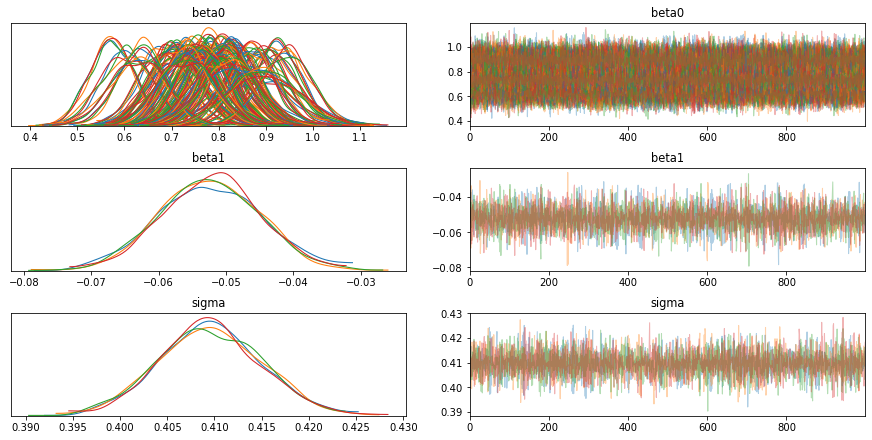

In [27]:
with unpooled_model:
    pm.traceplot(unpooled_trace)

In [28]:
estimate_unpool = pd.Series(unpooled_trace['beta0'].mean(axis=0), index=Location_lookup)
se_unpool = pd.Series(unpooled_trace['beta0'].std(axis=0), index=Location_lookup)

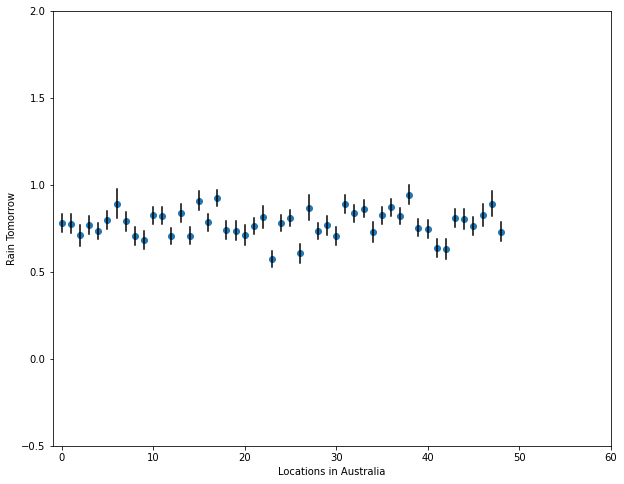

In [29]:
plt.figure(figsize = (10,8))
plt.scatter(range(len(estimate_unpool)), estimate_unpool)
for i, m, se in zip(range(len(estimate_unpool)), estimate_unpool, se_unpool):
    plt.plot([i,i], [m-se, m+se], 'black')
plt.xlim(-1,60); plt.ylim(-0.5,2)
plt.ylabel('Rain Tomorrow');plt.xlabel('Locations in Australia');

### Hierachical Model 

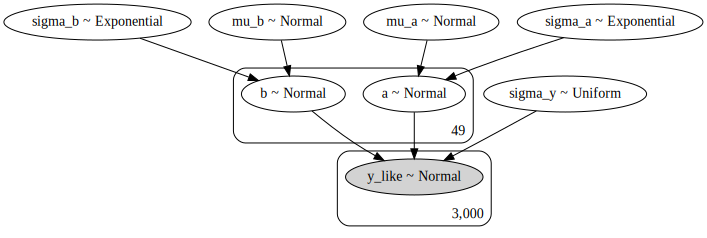

In [30]:
with pm.Model() as intercept_model:
    #Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=100)
    sigma_a = pm.Exponential("sigma_a", 0.5)
    mu_b = pm.Normal('mu_b', mu=0., sd=100)
    sigma_b = pm.Exponential("sigma_b", .5)

    #Intercept, Random
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=locations)
    # Random slopes
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=locations)
    #Error
    sigma_y = pm.Uniform('sigma_y', lower=0, upper=100)
    #E(X)
    y_hat = a[location_Code] + b[location_Code] * Rainfall
    #Likelihood
    y_like = pm.Normal('y_like', mu=y_hat, sd=sigma_y, observed=RainTomorrow)
    
pm.model_to_graphviz(intercept_model)

In [31]:
with intercept_model:
    intercept_model_trace = pm.sample(3500, step = pm.NUTS(target_accept = 0.999), cores = 4, tune=1000)
    intercept_model_idata = az.from_pymc3(intercept_model_trace)
az.summary(intercept_model_idata, round_to=2)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_y, b, a, sigma_b, mu_b, sigma_a, mu_a]
Sampling 4 chains, 0 divergences: 100%|█| 18000/18000 [02:29<00:00, 120.33draws
The number of effective samples is smaller than 25% for some parameters.


mean    sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean    ess_sd  \
mu_a     0.77  0.01    0.75     0.79        0.0      0.0   7415.62   7415.45   
mu_b    -0.11  0.03   -0.17    -0.06        0.0      0.0   2199.95   2199.95   
a[0]     0.78  0.04    0.71     0.85        0.0      0.0  18337.52  18337.52   
a[1]     0.77  0.04    0.70     0.85        0.0      0.0  18358.49  18280.53   
a[2]     0.74  0.04    0.66     0.82        0.0      0.0  14832.67  14832.67   
...       ...   ...     ...      ...        ...      ...       ...       ...   
b[47]   -0.07  0.03   -0.13    -0.02        0.0      0.0  18339.48  16379.77   
b[48]   -0.10  0.04   -0.18    -0.02        0.0      0.0  18444.44  12636.71   
sigma_a  0.06  0.01    0.04     0.08        0.0      0.0   4302.42   4302.42   
sigma_b  0.11  0.03    0.05     0.17        0.0      0.0   1507.54   1507.54   
sigma_y  0.41  0.01    0.40     0.42        0.0      0.0  12920.90  12876.66   

         ess_bulk  ess_tail  r_hat  
mu_a      7413.23   9886.79    1.0  
mu_b      2137.48   5039.12    1.0  
a[0]     18340.62   9776.98    1.0  
a[1]     18364.21  10881.61    1.0  
a[2]     14871.41   9478.88    1.0  
...           ...       ...    ...  
b[47]    18355.34  10764.02    1.0  
b[48]    18708.24   8815.70    1.0  
sigma_a   4105.06   4369.67    1.0  
sigma_b   1421.80   1600.94    1.0  
sigma_y  12988.29  10934.73    1.0  

[103 rows x 11 columns]

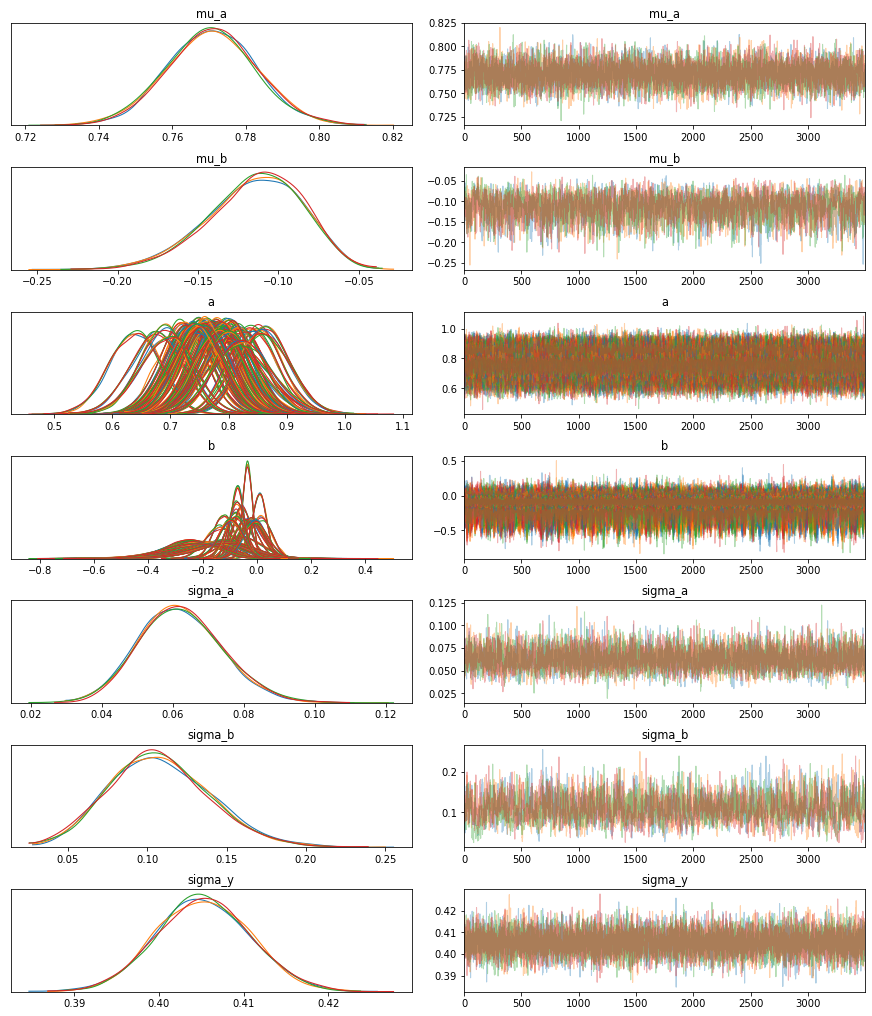

In [32]:
with intercept_model:
    pm.traceplot(intercept_model_trace)